In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# test on imdb data
# import data
imdb = pd.read_csv('data/imdb.txt', delimiter='\t', header=None)
imdb.columns = ['message', 'positive']

In [3]:
imdb[imdb['positive'] == 1].head()

,message,positive
4,The best scene in the movie was when Gerardo i...,1
7,Saw the movie today and thought it was a good ...,1
9,Loved the casting of Jimmy Buffet as the scien...,1
10,And those baby owls were adorable.,1
11,The movie showed a lot of Florida at it's best...,1


In [4]:
''' Using new keywords that are more relevant to movies. 
keywords = ['great', 'good', 'excellent', 'love', 'like','liked','quality'
           ,'awesome', 'enjoy', 'impressed', 'satisfied', 'well', 'recommend',
           'sweet', 'sweetest', 'secure', 'best', 'wonderful', 'beautiful', 'nice', 'funny',
           'value', 'ideal', 'happy', 'first-rate', 'insightful', 'clever', 'charming',
            'comical', 'charismatic', 'enjoyable', 'uproar', 'original', 'tender', 'absorbing',
            'sensitive', 'riveting', 'intriguing', 'powerful', 'fascinating', 'pleasant', 
            'surprising', 'dazzling', 'imaginative', 'legendary', 'unpretentious', 'suspenseful']'''

" Using new keywords that are more relevant to movies. \nkeywords = ['great', 'good', 'excellent', 'love', 'like','liked','quality'\n           ,'awesome', 'enjoy', 'impressed', 'satisfied', 'well', 'recommend',\n           'sweet', 'sweetest', 'secure', 'best', 'wonderful', 'beautiful', 'nice', 'funny',\n           'value', 'ideal', 'happy', 'first-rate', 'insightful', 'clever', 'charming',\n            'comical', 'charismatic', 'enjoyable', 'uproar', 'original', 'tender', 'absorbing',\n            'sensitive', 'riveting', 'intriguing', 'powerful', 'fascinating', 'pleasant', \n            'surprising', 'dazzling', 'imaginative', 'legendary', 'unpretentious', 'suspenseful']"

In [5]:
'''for key in keywords:
    imdb[str(key)] = imdb.message.str.contains(str(key), case=False)'''

'for key in keywords:\n    imdb[str(key)] = imdb.message.str.contains(str(key), case=False)'

In [6]:
'''plt.subplots(figsize=(15,10))
sns.heatmap(imdb.corr())
plt.show()'''

'plt.subplots(figsize=(15,10))\nsns.heatmap(imdb.corr())\nplt.show()'

In [7]:
# checking for correlation we can see that some of these words are definitely correlated with each other.
# We can attribute that to movie reviews typically having multiple positive keywords in each review/. People
# very passsionate about there movies. Let's change our keywords and remove some of the correlation since 
# Naive Bayes assumes indenpent variables. 

# Using new keywords that are more relevant to movies. 
keywords2 =  ['great', 'good', 'excellent', 'love', 'like','liked','quality'
           ,'awesome', 'enjoy', 'impressed', 'satisfied', 'well', 'recommend',
           'sweet', 'sweetest', 'secure', 'best', 'wonderful', 'beautiful', 'nice', 'funny',
           'value', 'ideal', 'happy', 'first-rate', 'insightful', 'clever', 'charming',
            'comical', 'charismatic', 'enjoyable', 'uproar', 'original', 'tender', 'absorbing',
            'sensitive', 'riveting', 'intriguing', 'powerful', 'fascinating', 'pleasant', 
            'surprising', 'dazzling', 'imaginative', 'legendary', 'unpretentious', 'suspenseful']

In [8]:
for key in keywords2:
    imdb[str(key)] = imdb.message.str.contains(str(key), case=False)

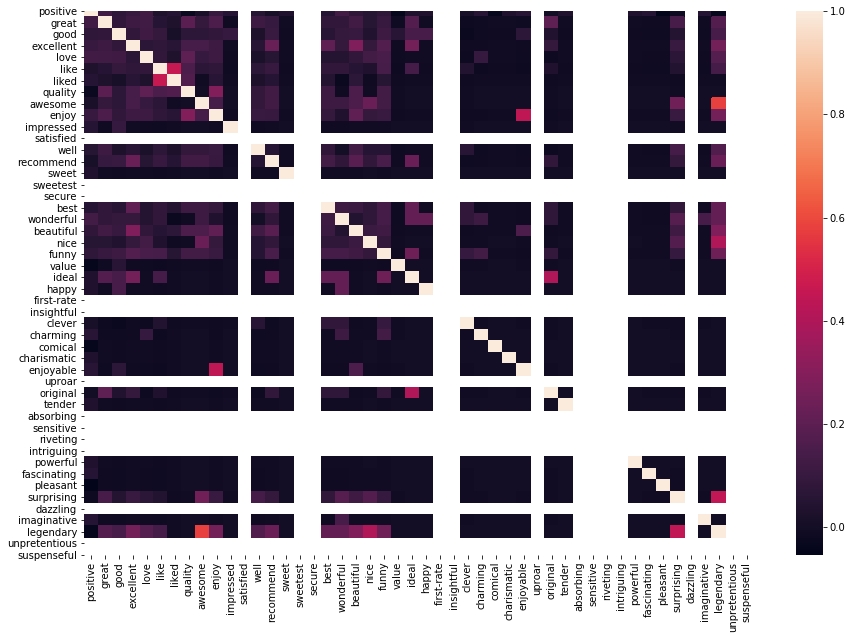

In [9]:
plt.subplots(figsize=(15,10))
sns.heatmap(imdb.corr())
plt.show()

In [10]:
#standardize case before running test
imdb['message'] = imdb['message'].apply(lambda x: str(x).lower())

#write loop to check for keywords in imdb message, populate data input
for key in keywords2:
    imdb[str(key)] = imdb.message.str.contains(str(key), case=False)
    
# data is boolean so we are going to use BernoulliNB
from sklearn.naive_bayes import BernoulliNB
# rename to shorter
bern = BernoulliNB()

#specify training input from 
imdb_data = imdb[keywords2]
imdb_target = imdb['positive']

# fit model to data
bern.fit(imdb_data, imdb_target)

#predict and store as new variable
imdb['prediction'] = bern.predict(imdb_data)

#display results and accuracy
print('Number of mislabeld points out of a total {} points: {}'.format(len(imdb_target), (imdb_target != imdb.prediction).sum()))
print('Model accuracy on yelp data: ', accuracy_score(imdb.positive, imdb.prediction))

Number of mislabeld points out of a total 748 points: 246
Model accuracy on yelp data:  0.6711229946524064
